In [1]:
import torch
import os
import sys
sys.path.insert(0, os.path.abspath('../'))
from DNN_module import Net

# CPU
torch.set_default_device("cpu")

%run ../NCoinDP_functions.ipynb

# MOUJ

In [2]:
# load net
net = Net(D_in = 72, D_out = 5, H = 512, H2 = 512, H3 = 512)

kappa_range = [0.1, 3]
beta_range = [-1, 1]
sigma2_range = [0.1, 1.5]

lambda_range = [0.01, 1]
mu_range = [0.1,1.5]

output_range = np.array([kappa_range, beta_range, sigma2_range, lambda_range, mu_range])

In [3]:
nums = [1000, 3000, 5000]
sim_test = 5000
y0 = 1 * torch.ones(sim_test)
param = torch.tensor([1, 0, 1, 0.07, 1]) 
param1 = torch.tensor([1.5, 0.5, 1.3, 0.5, 0.5]) 
param2 = torch.tensor([2, -0.5, 0.6, 0.8, 0.25]) 


results = []
results1 = []
results2 = []

results_std = []
results1_std = []
results2_std = []

for n in nums:
    delta = 1/12

    # Observation time
    obtime = np.arange(0,n+1)/n * n * delta
    
    # seed number
    torch.manual_seed(1)
    
    yL = MROUJ_simul_sample(obtime, 20, y0, param[0]*torch.ones(sim_test), param[1]*torch.ones(sim_test), 
        param[2] ** (1/2)* torch.ones(sim_test), param[3]* torch.ones(sim_test), param[4]* torch.ones(sim_test))
    
    x_test = MROUJ_summary(yL)
    
    yL1 = MROUJ_simul_sample(obtime, 20, y0, param1[0]*torch.ones(sim_test), param1[1]*torch.ones(sim_test), 
        param1[2] ** (1/2)* torch.ones(sim_test), param1[3]* torch.ones(sim_test), param1[4]* torch.ones(sim_test))
    
    x_test1 = MROUJ_summary(yL1)
    
    yL2 = MROUJ_simul_sample(obtime, 20, y0, param2[0]*torch.ones(sim_test), param2[1]*torch.ones(sim_test), 
        param2[2] ** (1/2)* torch.ones(sim_test), param2[3]* torch.ones(sim_test), param2[4]* torch.ones(sim_test))
    
    x_test2 = MROUJ_summary(yL2)
    
    
    results_n = []
    results_n1 = []
    results_n2 = []
    
    results_std_n = []
    results_std_n1 = []
    results_std_n2 = []
    
    for j in range(10): 
        net_path = "./MROUJ/MROUJ_nets/MROUJ_"
        net_path = net_path + str(j)

        tmp_path = "_"+str(n)
        net_path = net_path + tmp_path + ".pt"
        
        # scale_path
        scale_path = "./MROUJ/MROUJ_sim/MROUJ_scale/MROUJ_scale" + str(j) + "_" + str(n) + ".pt"
        [a, b] = torch.load(scale_path)
        
        x_test_scale = torch.clone((x_test - a ) / (b - a))
        x_test1_scale = torch.clone((x_test1 - a ) / (b - a))
        x_test2_scale = torch.clone((x_test2 - a ) / (b - a))
        
        
        print(j)
        net.load_state_dict(torch.load(net_path))
        net.eval()
        results_n.append(torch.mean(net(x_test_scale), 0))
        results_n1.append(torch.mean(net(x_test1_scale), 0))
        results_n2.append(torch.mean(net(x_test2_scale), 0))
        
        results_std_n.append(torch.std(net(x_test_scale), 0))
        results_std_n1.append(torch.std(net(x_test_scale), 0))
        results_std_n2.append(torch.std(net(x_test_scale), 0))
        
        
    results.append(results_n)
    results1.append(results_n1)
    results2.append(results_n2)
    
    results_std.append(results_std_n)
    results1_std.append(results_std_n1)
    results2_std.append(results_std_n2)

0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9


In [4]:
import numpy as np

results_plot = []
results1_plot = []
results2_plot = []

for i in range(len(nums)):
    results_tmp = []
    results_tmp.append(torch.mean(torch.stack(results[i]),0).detach().cpu().numpy())
    results_tmp.append(torch.min(torch.stack(results[i]),0).values.detach().cpu().numpy())
    results_tmp.append(torch.max(torch.stack(results[i]),0).values.detach().cpu().numpy())
    results_tmp.append(torch.mean(torch.stack(results_std[i]),0).detach().cpu().numpy())
    
    results_plot.append(results_tmp)
    
    results1_tmp = []
    results1_tmp.append(torch.mean(torch.stack(results1[i]),0).detach().cpu().numpy())
    results1_tmp.append(torch.min(torch.stack(results1[i]),0).values.detach().cpu().numpy())
    results1_tmp.append(torch.max(torch.stack(results1[i]),0).values.detach().cpu().numpy())
    results1_tmp.append(torch.mean(torch.stack(results1_std[i]),0).detach().cpu().numpy())
    results1_plot.append(results1_tmp)
    
    results2_tmp = []
    results2_tmp.append(torch.mean(torch.stack(results2[i]),0).detach().cpu().numpy())
    results2_tmp.append(torch.min(torch.stack(results2[i]),0).values.detach().cpu().numpy())
    results2_tmp.append(torch.max(torch.stack(results2[i]),0).values.detach().cpu().numpy())
    results2_tmp.append(torch.mean(torch.stack(results2_std[i]),0).detach().cpu().numpy())
    results2_plot.append(results2_tmp)
    
results_plot = np.array(results_plot)
results1_plot = np.array(results1_plot)
results2_plot = np.array(results2_plot)

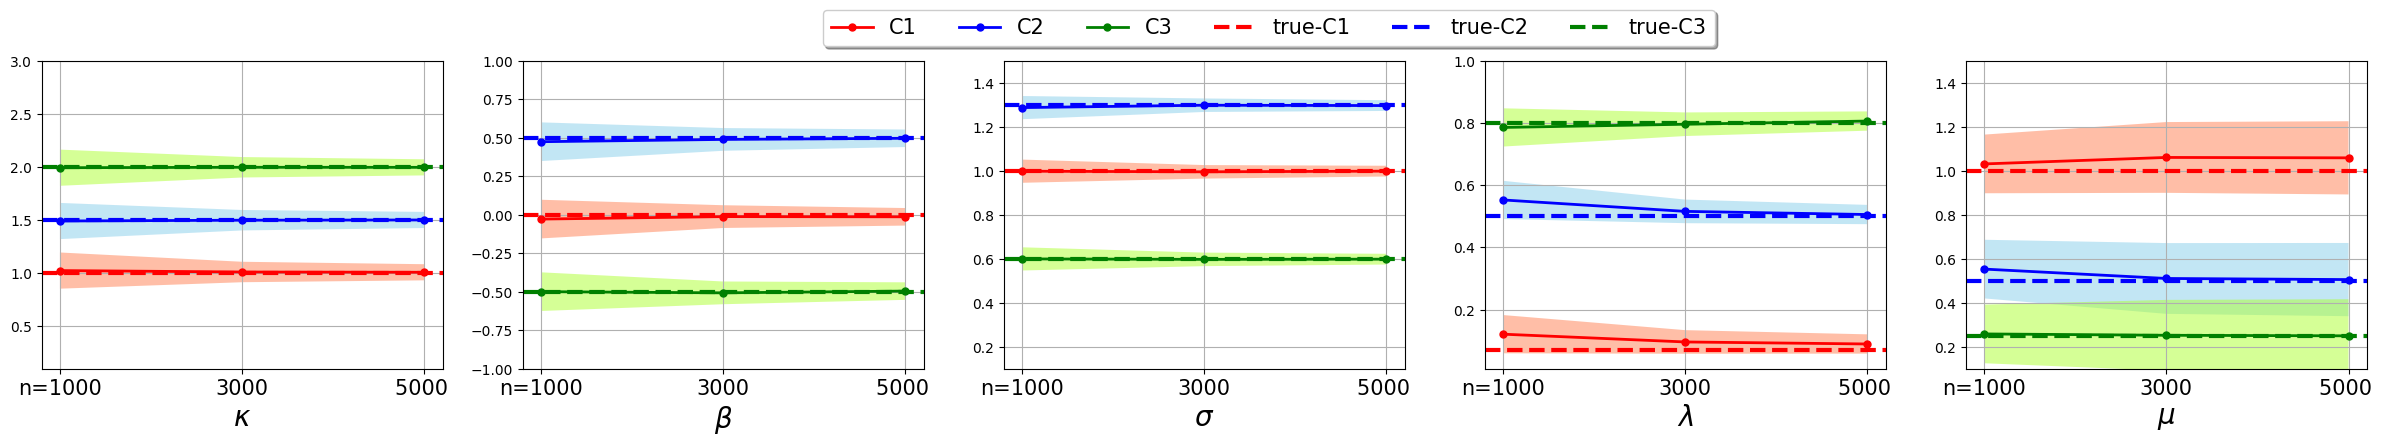

In [5]:
fig, axs = plt.subplots(1, param.size()[0])
esti_name = [r'$\kappa$', r'$\beta$', r'$\sigma$', r'$\lambda$', r'$\mu$']

fig.set_figwidth(30)
fig.set_figheight(4)

nums = [1000, 3000, 5000]

    
for j in range(param.size()[0]): # Scenarios
    
    #axs[j].plot(nums, MCMC_results[j], linestyle = 'dotted',marker = 's', 
    #            markersize = 5, color = "green", linewidth=2)
    #axs[0,j].set_xlim(xlim[j])
    #axs[0,j].set_xticks(x_S[j])
    axs[j].grid()
    axs[j].set_xlabel(esti_name[j], fontsize=20)
    axs[j].set_xticks(nums, ["n=1000", "3000", "5000 "], fontsize = 15)
    axs[j].set_ylim(output_range[j])

    
    axs[j].plot(nums, results_plot[:,0,j], marker = 'o', 
                    markersize =5, color = "red", linewidth=2)
    
    axs[j].plot(nums, results1_plot[:,0,j], marker = 'o', 
                    markersize =5, color = "blue", linewidth=2)
    
    axs[j].plot(nums, results2_plot[:,0,j], marker = 'o', 
                    markersize =5, color = "green", linewidth=2)
    
    axs[j].axhline(y = param[j], color = 'red', linestyle = '--', linewidth = 3) 
    axs[j].axhline(y = param1[j], color = 'blue', linestyle = '--', linewidth = 3) 
    axs[j].axhline(y = param2[j], color = 'green', linestyle = '--', linewidth = 3) 
    
    ymin = results_plot[:,0,j] - results_plot[:,3,j]
    ymax = results_plot[:,0,j] + results_plot[:,3,j]
    
    ymin1 = results1_plot[:,0,j] - results1_plot[:,3,j] 
    ymax1 = results1_plot[:,0,j] + results1_plot[:,3,j] 
    
    ymin2 = results2_plot[:,0,j] - results2_plot[:,3,j] 
    ymax2 = results2_plot[:,0,j] + results2_plot[:,3,j] 
    
    axs[j].fill_between(nums, ymin, ymax, where = ymax >ymin, facecolor ="coral", alpha = 0.5)
    axs[j].fill_between(nums, ymin1, ymax1, where = ymax1 >ymin1, facecolor ="skyblue", alpha = 0.5)
    axs[j].fill_between(nums, ymin2, ymax2, where = ymax2 >ymin2, facecolor ="greenyellow", alpha = 0.5)
    axs[0].legend(['C1', 'C2', 'C3', 'true-C1', 'true-C2', 'true-C3'], loc = "best", fontsize=15, 
                  bbox_to_anchor=(4.2, +1.2), fancybox=True, shadow=True, ncol=6)
#fig.tight_layout()
plt.savefig("JD_plots/MOUJ2.pdf", bbox_inches='tight') 

# SQRJ

In [6]:
# load net
net = Net(D_in = 71, D_out = 5, H = 512, H2 = 512, H3 = 512)

kappa_range = [0.6, 3.5]
beta_range = [0.5, 2]
sigma2_range = [0.1, 0.5]

lambda_range = [0.01, 1]
mu_range = [0.1,1.5]

output_range = np.array([kappa_range, beta_range, sigma2_range, lambda_range, mu_range])

In [7]:
nums = [1000, 3000, 5000]
sim_test = 5000
y0 = 1 * torch.ones(sim_test)
param = torch.tensor([1, 1.6, 0.3, 0.07, 1]) 
param1 = torch.tensor([2, 0.8, 0.4, 0.5, 0.5]) 
param2 = torch.tensor([3, 1.3, 0.2, 0.8, 0.25]) 


results = []
results1 = []
results2 = []


results_std = []
results1_std = []
results2_std = []

for n in nums:
    delta = 1/12

    # Observation time
    obtime = np.arange(0,n+1)/n * n * delta
    
    # seed number
    torch.manual_seed(1)
    
    yL = SQRJ_simul_sample(obtime, 20, y0, param[0]*torch.ones(sim_test), param[1]*torch.ones(sim_test), 
        param[2] ** (1/2)* torch.ones(sim_test), param[3]* torch.ones(sim_test), param[4]* torch.ones(sim_test))
    
    x_test = SQRJ_summary(yL)
    
    yL1 = SQRJ_simul_sample(obtime, 20, y0, param1[0]*torch.ones(sim_test), param1[1]*torch.ones(sim_test), 
        param1[2] ** (1/2)* torch.ones(sim_test), param1[3]* torch.ones(sim_test), param1[4]* torch.ones(sim_test))
    
    x_test1 = SQRJ_summary(yL1)
    
    yL2 = SQRJ_simul_sample(obtime, 20, y0, param2[0]*torch.ones(sim_test), param2[1]*torch.ones(sim_test), 
        param2[2] ** (1/2)* torch.ones(sim_test), param2[3]* torch.ones(sim_test), param2[4]* torch.ones(sim_test))
    
    x_test2 = SQRJ_summary(yL2)
   
    
    results_n = []
    results_n1 = []
    results_n2 = []
    
    results_std_n = []
    results_std_n1 = []
    results_std_n2 = []
    
    for j in range(10): 
        net_path = "./SQRJ/SQRJ_nets/SQRJ_"
        net_path = net_path + str(j)
        tmp_path = "_"+str(n)
        net_path = net_path + tmp_path + ".pt"
        

        # scale_path
        scale_path = "./SQRJ/SQRJ_sim/SQRJ_scale/SQRJ_scale" + str(j) + "_" + str(n) + ".pt"
        [a, b] = torch.load(scale_path)
        
        x_test_scale = torch.clone((x_test - a ) / (b - a))
        x_test1_scale = torch.clone((x_test1 - a ) / (b - a))
        x_test2_scale = torch.clone((x_test2 - a ) / (b - a))
        
        
        print(j)
        net.load_state_dict(torch.load(net_path))
        net.eval()
        results_n.append(torch.mean(net(x_test_scale), 0))
        results_n1.append(torch.mean(net(x_test1_scale), 0))
        results_n2.append(torch.mean(net(x_test2_scale), 0))
        
        results_std_n.append(torch.std(net(x_test_scale), 0))
        results_std_n1.append(torch.std(net(x_test_scale), 0))
        results_std_n2.append(torch.std(net(x_test_scale), 0))
        
        
    results.append(results_n)
    results1.append(results_n1)
    results2.append(results_n2)
    
    results_std.append(results_std_n)
    results1_std.append(results_std_n1)
    results2_std.append(results_std_n2)

0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9


In [8]:
import numpy as np

results_plot = []
results1_plot = []
results2_plot = []

for i in range(len(nums)):
    results_tmp = []
    results_tmp.append(torch.mean(torch.stack(results[i]),0).detach().cpu().numpy())
    results_tmp.append(torch.min(torch.stack(results[i]),0).values.detach().cpu().numpy())
    results_tmp.append(torch.max(torch.stack(results[i]),0).values.detach().cpu().numpy())
    results_tmp.append(torch.mean(torch.stack(results_std[i]),0).detach().cpu().numpy())
    
    results_plot.append(results_tmp)
    
    results1_tmp = []
    results1_tmp.append(torch.mean(torch.stack(results1[i]),0).detach().cpu().numpy())
    results1_tmp.append(torch.min(torch.stack(results1[i]),0).values.detach().cpu().numpy())
    results1_tmp.append(torch.max(torch.stack(results1[i]),0).values.detach().cpu().numpy())
    results1_tmp.append(torch.mean(torch.stack(results1_std[i]),0).detach().cpu().numpy())
    results1_plot.append(results1_tmp)
    
    results2_tmp = []
    results2_tmp.append(torch.mean(torch.stack(results2[i]),0).detach().cpu().numpy())
    results2_tmp.append(torch.min(torch.stack(results2[i]),0).values.detach().cpu().numpy())
    results2_tmp.append(torch.max(torch.stack(results2[i]),0).values.detach().cpu().numpy())
    results2_tmp.append(torch.mean(torch.stack(results2_std[i]),0).detach().cpu().numpy())
    results2_plot.append(results2_tmp)
    
results_plot = np.array(results_plot)
results1_plot = np.array(results1_plot)
results2_plot = np.array(results2_plot)

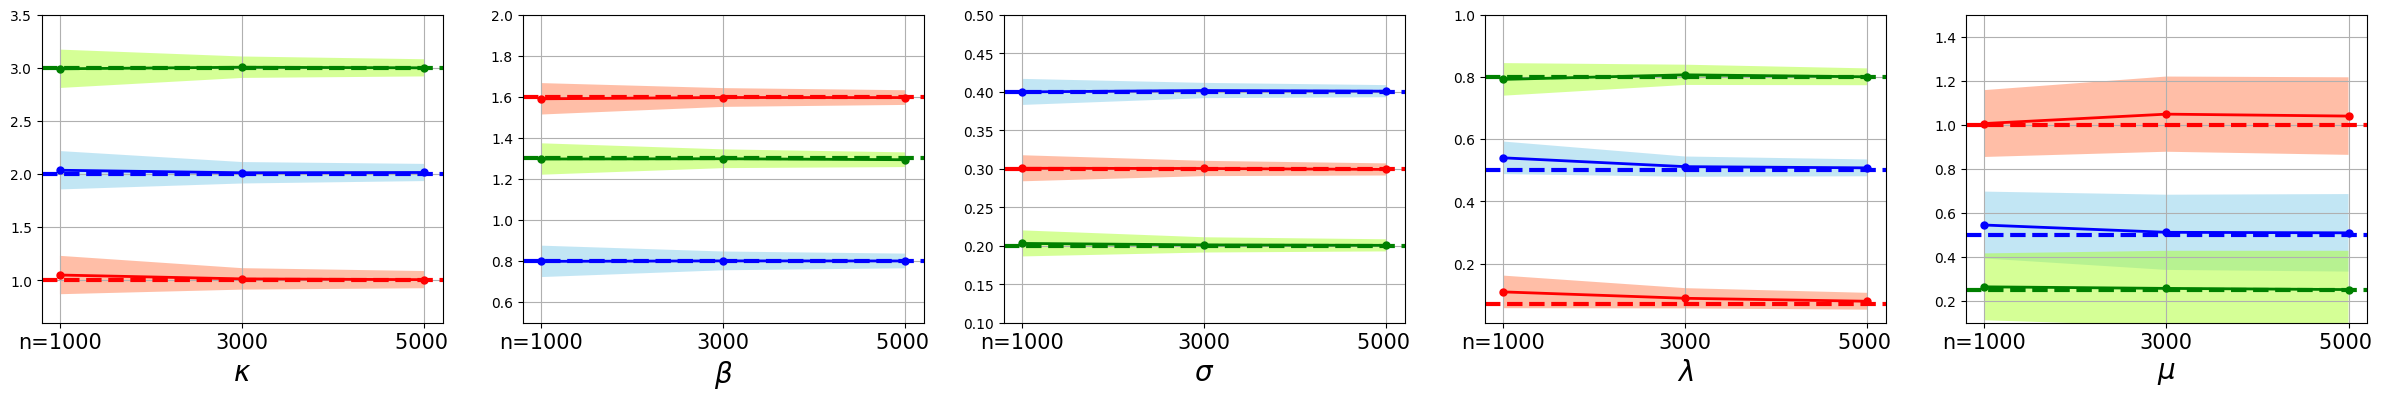

In [9]:
fig, axs = plt.subplots(1, param.size()[0])
esti_name = [r'$\kappa$', r'$\beta$', r'$\sigma$', r'$\lambda$', r'$\mu$']

fig.set_figwidth(30)
fig.set_figheight(4)

nums = [1000, 3000, 5000]

    
for j in range(param.size()[0]): # Scenarios
    
    #axs[j].plot(nums, MCMC_results[j], linestyle = 'dotted',marker = 's', 
    #            markersize = 5, color = "green", linewidth=2)
    #axs[0,j].set_xlim(xlim[j])
    #axs[0,j].set_xticks(x_S[j])
    axs[j].grid()
    axs[j].set_xlabel(esti_name[j], fontsize=20)
    axs[j].set_xticks(nums, ["n=1000", "3000", "5000 "], fontsize = 15)
    axs[j].set_ylim(output_range[j])

    
    axs[j].plot(nums, results_plot[:,0,j], marker = 'o', 
                    markersize =5, color = "red", linewidth=2)
    
    axs[j].plot(nums, results1_plot[:,0,j], marker = 'o', 
                    markersize =5, color = "blue", linewidth=2)
    
    axs[j].plot(nums, results2_plot[:,0,j], marker = 'o', 
                    markersize =5, color = "green", linewidth=2)
    
    axs[j].axhline(y = param[j], color = 'red', linestyle = '--', linewidth = 3) 
    axs[j].axhline(y = param1[j], color = 'blue', linestyle = '--', linewidth = 3) 
    axs[j].axhline(y = param2[j], color = 'green', linestyle = '--', linewidth = 3) 
    
    ymin = results_plot[:,0,j] - results_plot[:,3,j]
    ymax = results_plot[:,0,j] + results_plot[:,3,j]
    
    ymin1 = results1_plot[:,0,j] - results1_plot[:,3,j] 
    ymax1 = results1_plot[:,0,j] + results1_plot[:,3,j] 
    
    ymin2 = results2_plot[:,0,j] - results2_plot[:,3,j] 
    ymax2 = results2_plot[:,0,j] + results2_plot[:,3,j] 
    
    axs[j].fill_between(nums, ymin, ymax, where = ymax >ymin, facecolor ="coral", alpha = 0.5)
    axs[j].fill_between(nums, ymin1, ymax1, where = ymax1 >ymin1, facecolor ="skyblue", alpha = 0.5)
    axs[j].fill_between(nums, ymin2, ymax2, where = ymax2 >ymin2, facecolor ="greenyellow", alpha = 0.5)
    #axs[0].legend(['C1', 'C2', 'C3', 'true-C1', 'true-C2', 'true-C3'], loc = "best", fontsize=15, 
    #              bbox_to_anchor=(4.2, +1.2), fancybox=True, shadow=True, ncol=6)
#fig.tight_layout()
plt.savefig("JD_plots/SQRJ2.pdf", bbox_inches='tight') 

# PBJD

In [10]:
# load net
net = Net(D_in = 90, D_out = 6, H = 512, H2 = 512, H3 = 512)
beta_range = [-0.5, 0.5]
sigma2_range = [0.1, 1]

lamb_p_range = [0.1, 1]
lamb_n_range = [0.1, 1]

eta_p_range = [0.1, 1]
eta_n_range = [0.1, 1]

output_range = np.array([beta_range, sigma2_range, lamb_p_range, lamb_n_range, eta_p_range, eta_n_range])

In [11]:
nums = [1000, 3000, 5000]
sim_test = 5000
y0 = 0 * torch.ones(sim_test)
param = torch.tensor([0, 0.75, 0.15, 0.20, 0.8, 0.75]) 
param1 = torch.tensor([0.3, 0.45, 0.45, 0.55, 0.5, 0.45]) 
param2 = torch.tensor([-0.3, 0.15, 0.80, 0.70, 0.2, 0.25]) 

results = []
results1 = []
results2 = []

results_std = []
results1_std = []
results2_std = []


for n in nums:
    delta = 1/12

    # Observation time
    obtime = np.arange(0,n+1)/n * n * delta
    
    # seed number
    torch.manual_seed(1)
    
    yL = PBJD_simul_sample(obtime, y0, param[0]*torch.ones(sim_test), param[1] ** (1/2)*torch.ones(sim_test), 
        param[2]* torch.ones(sim_test), param[3]* torch.ones(sim_test), param[4]* torch.ones(sim_test), param[5] * torch.ones(sim_test))
    
    x_test = PBJD_summary(yL, delta)
    
    yL1 = PBJD_simul_sample(obtime, y0, param1[0]*torch.ones(sim_test), param1[1] ** (1/2)*torch.ones(sim_test), 
        param1[2]* torch.ones(sim_test), param1[3]* torch.ones(sim_test), param1[4]* torch.ones(sim_test), param1[5] * torch.ones(sim_test))
    
    x_test1 = PBJD_summary(yL1, delta)
    
    yL2 = PBJD_simul_sample(obtime, y0, param2[0]*torch.ones(sim_test), param2[1] ** (1/2)*torch.ones(sim_test), 
        param2[2]* torch.ones(sim_test), param2[3]* torch.ones(sim_test), param2[4]* torch.ones(sim_test), param2[5] * torch.ones(sim_test))
    
    x_test2 = PBJD_summary(yL2, delta)
    
    
    results_n = []
    results_n1 = []
    results_n2 = []
    
    results_std_n = []
    results_std_n1 = []
    results_std_n2 = []
    
    for j in range(10): 
        net_path = "./PBJD/PBJD_nets/PBJD_"
        net_path = net_path + str(j)
        tmp_path = "_"+str(n)
        net_path = net_path + tmp_path + ".pt"
        

        # scale_path
        scale_path = "./PBJD/PBJD_sim/PBJD_scale/PBJD_scale" + str(j) + "_" + str(n) + ".pt"
        [a, b] = torch.load(scale_path)
        
        x_test_scale = torch.clone((x_test - a ) / (b - a))
        x_test1_scale = torch.clone((x_test1 - a ) / (b - a))
        x_test2_scale = torch.clone((x_test2 - a ) / (b - a))
        
        
        print(j)
        net.load_state_dict(torch.load(net_path))
        net.eval()
        results_n.append(torch.mean(net(x_test_scale), 0))
        results_n1.append(torch.mean(net(x_test1_scale), 0))
        results_n2.append(torch.mean(net(x_test2_scale), 0))
        
        results_std_n.append(torch.std(net(x_test_scale), 0))
        results_std_n1.append(torch.std(net(x_test_scale), 0))
        results_std_n2.append(torch.std(net(x_test_scale), 0))
        
        
    results.append(results_n)
    results1.append(results_n1)
    results2.append(results_n2)
    
    results_std.append(results_std_n)
    results1_std.append(results_std_n1)
    results2_std.append(results_std_n2)

0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9


In [12]:
import numpy as np

results_plot = []
results1_plot = []
results2_plot = []

for i in range(len(nums)):
    results_tmp = []
    results_tmp.append(torch.mean(torch.stack(results[i]),0).detach().cpu().numpy())
    results_tmp.append(torch.min(torch.stack(results[i]),0).values.detach().cpu().numpy())
    results_tmp.append(torch.max(torch.stack(results[i]),0).values.detach().cpu().numpy())
    results_tmp.append(torch.mean(torch.stack(results_std[i]),0).detach().cpu().numpy())
    
    results_plot.append(results_tmp)
    
    results1_tmp = []
    results1_tmp.append(torch.mean(torch.stack(results1[i]),0).detach().cpu().numpy())
    results1_tmp.append(torch.min(torch.stack(results1[i]),0).values.detach().cpu().numpy())
    results1_tmp.append(torch.max(torch.stack(results1[i]),0).values.detach().cpu().numpy())
    results1_tmp.append(torch.mean(torch.stack(results1_std[i]),0).detach().cpu().numpy())
    results1_plot.append(results1_tmp)
    
    results2_tmp = []
    results2_tmp.append(torch.mean(torch.stack(results2[i]),0).detach().cpu().numpy())
    results2_tmp.append(torch.min(torch.stack(results2[i]),0).values.detach().cpu().numpy())
    results2_tmp.append(torch.max(torch.stack(results2[i]),0).values.detach().cpu().numpy())
    results2_tmp.append(torch.mean(torch.stack(results2_std[i]),0).detach().cpu().numpy())
    results2_plot.append(results2_tmp)
    
results_plot = np.array(results_plot)
results1_plot = np.array(results1_plot)
results2_plot = np.array(results2_plot)

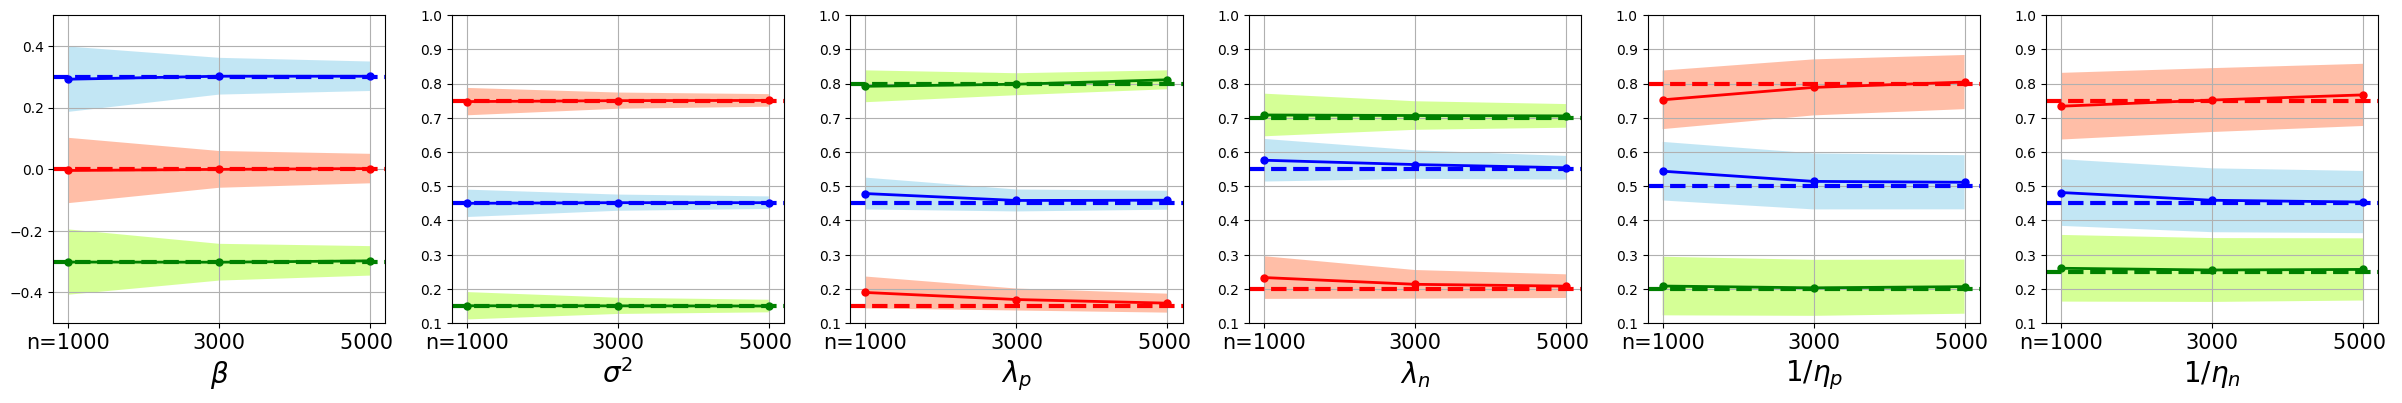

In [13]:
fig, axs = plt.subplots(1, param.size()[0])
esti_name = [r'$\beta$', r'$\sigma^2$', r'$\lambda_p$', r'$\lambda_n$', r'$1/\eta_p$', r'$1/\eta_n$']

fig.set_figwidth(30)
fig.set_figheight(4)

nums = [1000, 3000, 5000]

    
for j in range(param.size()[0]): # Scenarios
    
    #axs[j].plot(nums, MCMC_results[j], linestyle = 'dotted',marker = 's', 
    #            markersize = 5, color = "green", linewidth=2)
    #axs[0,j].set_xlim(xlim[j])
    #axs[0,j].set_xticks(x_S[j])
    axs[j].grid()
    axs[j].set_xlabel(esti_name[j], fontsize=20)
    axs[j].set_xticks(nums, ["n=1000", "3000", "5000 "], fontsize = 15)
    axs[j].set_ylim(output_range[j])

    
    axs[j].plot(nums, results_plot[:,0,j], marker = 'o', 
                    markersize =5, color = "red", linewidth=2)
    
    axs[j].plot(nums, results1_plot[:,0,j], marker = 'o', 
                    markersize =5, color = "blue", linewidth=2)
    
    axs[j].plot(nums, results2_plot[:,0,j], marker = 'o', 
                    markersize =5, color = "green", linewidth=2)
    
    axs[j].axhline(y = param[j], color = 'red', linestyle = '--', linewidth = 3) 
    axs[j].axhline(y = param1[j], color = 'blue', linestyle = '--', linewidth = 3) 
    axs[j].axhline(y = param2[j], color = 'green', linestyle = '--', linewidth = 3) 
    
    ymin = results_plot[:,0,j] - results_plot[:,3,j]
    ymax = results_plot[:,0,j] + results_plot[:,3,j]
    
    ymin1 = results1_plot[:,0,j] - results1_plot[:,3,j] 
    ymax1 = results1_plot[:,0,j] + results1_plot[:,3,j] 
    
    ymin2 = results2_plot[:,0,j] - results2_plot[:,3,j] 
    ymax2 = results2_plot[:,0,j] + results2_plot[:,3,j] 
    
    axs[j].fill_between(nums, ymin, ymax, where = ymax >ymin, facecolor ="coral", alpha = 0.5)
    axs[j].fill_between(nums, ymin1, ymax1, where = ymax1 >ymin1, facecolor ="skyblue", alpha = 0.5)
    axs[j].fill_between(nums, ymin2, ymax2, where = ymax2 >ymin2, facecolor ="greenyellow", alpha = 0.5)
    #axs[0].legend(['C1', 'C2', 'C3', 'true-C1', 'true-C2', 'true-C3'], loc = "best", fontsize=15, 
    #              bbox_to_anchor=(4.2, +1.2), fancybox=True, shadow=True, ncol=6)
plt.savefig("JD_plots/PBJD2.pdf", bbox_inches='tight') 

# BOUJ

In [4]:
# load net
net = Net(D_in = 130, D_out = 11, H = 1024, H2 = 1024, H3 = 1024)
kappa_11_range = [0.1, 3]
kappa_21_range = [0.1, 3]
kappa_22_range = [0.1, 3]

beta_1_range = [-1, 1]
beta_2_range = [-1, 1]

sigma2_1_range = [0.1, 0.5]
sigma2_2_range = [0.1, 0.5]

lambda_1_range = [0.01, 1]
lambda_2_range = [0.01, 1]

mu_1_range = [0.1,1.5]
mu_2_range = [0.1,1.5]

output_range = np.array([kappa_11_range, kappa_21_range, kappa_22_range, beta_1_range, beta_2_range,
                         sigma2_1_range, sigma2_2_range, lambda_1_range, lambda_2_range, mu_1_range, mu_2_range])

In [5]:
nums = [1000, 3000, 5000]
sim_test = 5000
y01 = torch.ones(sim_test) * 0
y02 = torch.ones(sim_test) * 0
    
param  = torch.tensor([2,   0.8,  1.7, -0.5,  0.5, 0.15,  0.4,  0.8, 0.15,    1,  0.5])
param1 = torch.tensor([1.5, 2.3,  0.8,  0.5,    0,  0.4, 0.15,  0.5,  0.5,  0.5, 0.25])
param2 = torch.tensor([0.8, 1.5,  2.2,    0,  -0.5,  0.3,  0.3, 0.15,  0.8, 0.25,    1])


results = []
results1 = []
results2 = []


results_std = []
results1_std = []
results2_std = []

for n in nums:
    delta = 1/12

    # Observation time
    obtime = np.arange(0,n+1)/n * n * delta
    
    # seed number
    torch.manual_seed(1)
    
    yL = BOUJ_simul_sample(obtime, 20, y01, y02, param[0]*torch.ones(sim_test), param[1]*torch.ones(sim_test), 
                           param[2]*torch.ones(sim_test), param[3]*torch.ones(sim_test), 
                           param[4]*torch.ones(sim_test), param[5] ** (1/2) * torch.ones(sim_test), 
                           param[6] ** (1/2) * torch.ones(sim_test), 
                           param[7]*torch.ones(sim_test), param[8]*torch.ones(sim_test), 
                           param[9]*torch.ones(sim_test), param[10]*torch.ones(sim_test))
    
    x_test = BOUJ_summary(yL)
    
    yL1 = BOUJ_simul_sample(obtime, 20, y01, y02, param1[0]*torch.ones(sim_test), param1[1]*torch.ones(sim_test), 
                           param1[2]*torch.ones(sim_test), param1[3]*torch.ones(sim_test), 
                           param1[4]*torch.ones(sim_test), param1[5] ** (1/2) * torch.ones(sim_test), 
                           param1[6] ** (1/2) * torch.ones(sim_test), 
                           param1[7]*torch.ones(sim_test), param1[8]*torch.ones(sim_test), 
                           param1[9]*torch.ones(sim_test), param1[10]*torch.ones(sim_test))
    
    x_test1 = BOUJ_summary(yL1)
    
    yL2 = BOUJ_simul_sample(obtime, 20, y01, y02, param2[0]*torch.ones(sim_test), param2[1]*torch.ones(sim_test), 
                           param2[2]*torch.ones(sim_test), param2[3]*torch.ones(sim_test), 
                           param2[4]*torch.ones(sim_test), param2[5] ** (1/2) * torch.ones(sim_test), 
                           param2[6] ** (1/2) * torch.ones(sim_test), 
                           param2[7]*torch.ones(sim_test), param2[8]*torch.ones(sim_test), 
                           param2[9]*torch.ones(sim_test), param2[10]*torch.ones(sim_test))
    
    x_test2 = BOUJ_summary(yL2)
    
    results_n = []
    results_n1 = []
    results_n2 = []
    
    results_std_n = []
    results_std_n1 = []
    results_std_n2 = []
    
    
    for j in range(10): 
        net_path = "./BOUJ/BOUJ_nets/BOUJ_"
        net_path = net_path + str(j)

        tmp_path = "_"+str(n)
        net_path = net_path + tmp_path + ".pt"
        
        # scale_path
        scale_path = "./BOUJ/BOUJ_sim/BOUJ_scale/BOUJ_scale" + str(j) + "_" + str(n) + ".pt"
        [a, b] = torch.load(scale_path)
        
        x_test_scale = torch.clone((x_test - a ) / (b - a))
        x_test1_scale = torch.clone((x_test1 - a ) / (b - a))
        x_test2_scale = torch.clone((x_test2 - a ) / (b - a))
        
        
        print(j)
        net.load_state_dict(torch.load(net_path))
        net.eval()
        results_n.append(torch.mean(net(x_test_scale), 0))
        results_n1.append(torch.mean(net(x_test1_scale), 0))
        results_n2.append(torch.mean(net(x_test2_scale), 0))
        
        results_std_n.append(torch.std(net(x_test_scale), 0))
        results_std_n1.append(torch.std(net(x_test_scale), 0))
        results_std_n2.append(torch.std(net(x_test_scale), 0))
        
    results.append(results_n)
    results1.append(results_n1)
    results2.append(results_n2)
    
    results_std.append(results_std_n)
    results1_std.append(results_std_n1)
    results2_std.append(results_std_n2)

0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9


In [6]:
import numpy as np

results_plot = []
results1_plot = []
results2_plot = []

for i in range(len(nums)):
    results_tmp = []
    results_tmp.append(torch.mean(torch.stack(results[i]),0).detach().cpu().numpy())
    results_tmp.append(torch.min(torch.stack(results[i]),0).values.detach().cpu().numpy())
    results_tmp.append(torch.max(torch.stack(results[i]),0).values.detach().cpu().numpy())
    results_tmp.append(torch.mean(torch.stack(results_std[i]),0).detach().cpu().numpy())
    
    results_plot.append(results_tmp)
    
    results1_tmp = []
    results1_tmp.append(torch.mean(torch.stack(results1[i]),0).detach().cpu().numpy())
    results1_tmp.append(torch.min(torch.stack(results1[i]),0).values.detach().cpu().numpy())
    results1_tmp.append(torch.max(torch.stack(results1[i]),0).values.detach().cpu().numpy())
    results1_tmp.append(torch.mean(torch.stack(results1_std[i]),0).detach().cpu().numpy())
    results1_plot.append(results1_tmp)
    
    results2_tmp = []
    results2_tmp.append(torch.mean(torch.stack(results2[i]),0).detach().cpu().numpy())
    results2_tmp.append(torch.min(torch.stack(results2[i]),0).values.detach().cpu().numpy())
    results2_tmp.append(torch.max(torch.stack(results2[i]),0).values.detach().cpu().numpy())
    results2_tmp.append(torch.mean(torch.stack(results2_std[i]),0).detach().cpu().numpy())
    results2_plot.append(results2_tmp)
    
results_plot = np.array(results_plot)
results1_plot = np.array(results1_plot)
results2_plot = np.array(results2_plot)

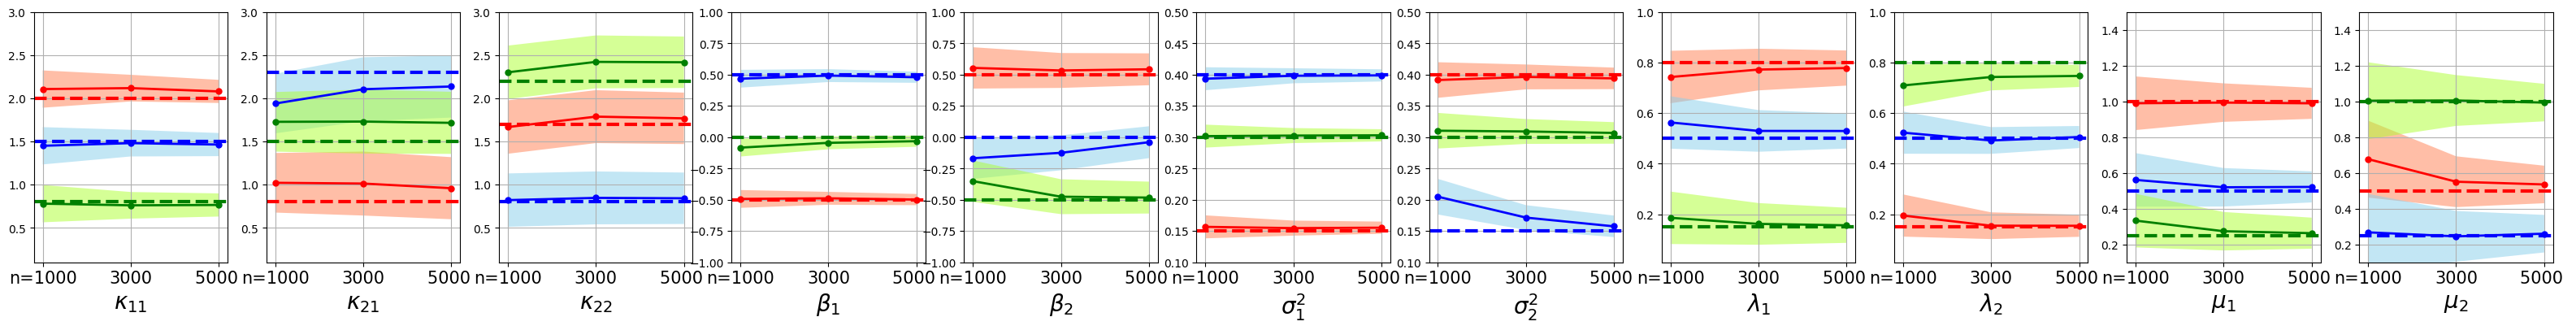

In [7]:
fig, axs = plt.subplots(1, param.size()[0])
esti_name = [r'$\kappa_{11}$', r'$\kappa_{21}$', r'$\kappa_{22}$', 
             r'$\beta_1$', r'$\beta_2$', r'$\sigma_1^2$', r'$\sigma_2^2$', 
             r'$\lambda_1$', r'$\lambda_2$', r'$\mu_1$', r'$\mu_2$']

fig.set_figwidth(40)
fig.set_figheight(4)

nums = [1000, 3000, 5000]

    
for j in range(param.size()[0]): # Scenarios
    
    #axs[j].plot(nums, MCMC_results[j], linestyle = 'dotted',marker = 's', 
    #            markersize = 5, color = "green", linewidth=2)
    #axs[0,j].set_xlim(xlim[j])
    #axs[0,j].set_xticks(x_S[j])
    axs[j].grid()
    axs[j].set_xlabel(esti_name[j], fontsize=20)
    axs[j].set_xticks(nums, ["n=1000", "3000", "5000 "], fontsize = 15)
    axs[j].set_ylim(output_range[j])

    
    axs[j].plot(nums, results_plot[:,0,j], marker = 'o', 
                    markersize =5, color = "red", linewidth=2)
    
    axs[j].plot(nums, results1_plot[:,0,j], marker = 'o', 
                    markersize =5, color = "blue", linewidth=2)
    
    axs[j].plot(nums, results2_plot[:,0,j], marker = 'o', 
                    markersize =5, color = "green", linewidth=2)
    
    axs[j].axhline(y = param[j], color = 'red', linestyle = '--', linewidth = 3) 
    axs[j].axhline(y = param1[j], color = 'blue', linestyle = '--', linewidth = 3) 
    axs[j].axhline(y = param2[j], color = 'green', linestyle = '--', linewidth = 3) 
    
    ymin = results_plot[:,0,j] - results_plot[:,3,j]
    ymax = results_plot[:,0,j] + results_plot[:,3,j]
    
    ymin1 = results1_plot[:,0,j] - results1_plot[:,3,j] 
    ymax1 = results1_plot[:,0,j] + results1_plot[:,3,j] 
    
    ymin2 = results2_plot[:,0,j] - results2_plot[:,3,j] 
    ymax2 = results2_plot[:,0,j] + results2_plot[:,3,j] 
    
    axs[j].fill_between(nums, ymin, ymax, where = ymax >ymin, facecolor ="coral", alpha = 0.5)
    axs[j].fill_between(nums, ymin1, ymax1, where = ymax1 >ymin1, facecolor ="skyblue", alpha = 0.5)
    axs[j].fill_between(nums, ymin2, ymax2, where = ymax2 >ymin2, facecolor ="greenyellow", alpha = 0.5)
    #axs[0].legend(['C1', 'C2', 'C3', 'true-C1', 'true-C2', 'true-C3'], loc = "best", fontsize=15, 
    #              bbox_to_anchor=(8, +1.2), fancybox=True, shadow=True, ncol=11)
plt.savefig("JD_plots/BOUJ2.pdf", bbox_inches='tight') 